<a href="https://colab.research.google.com/github/kaushikrahul1993/Oil-and-Gas-Domain/blob/main/Oil_and_Gas_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import os
import sys

In [26]:
path=r"/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/07-Oil and Gas Domain"

In [27]:
os.chdir(path)

In [28]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/RealTime Projects/May 2024- Project by Sundaram/07-Oil and Gas Domain'

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [30]:
# Problem statement : The goal is to predict the daily Production of oil wells.
# Data Collection : no need to worry, but if you want, pls visit data.gov website, search on kaggle/UCI machine learning
# data preprocessing
data = pd.read_csv('Oil_Well_dataset.csv')
data.head()

,WellID,Depth,YearDrilled,WellType,Geology,Production,Age,ProductionPerDepth
0,1,1360,2009,Offshore,Sandstone,464,15,0.341176
1,2,4272,2010,Offshore,Sandstone,339,14,0.079354
2,3,3592,1976,Onshore,Shale,387,48,0.107739
3,4,966,1973,Onshore,Shale,297,51,0.307453
4,5,4926,1968,Offshore,Sandstone,403,56,0.081811


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              1000 non-null   int64  
 1   Depth               1000 non-null   int64  
 2   YearDrilled         1000 non-null   int64  
 3   WellType            1000 non-null   object 
 4   Geology             1000 non-null   object 
 5   Production          1000 non-null   int64  
 6   Age                 1000 non-null   int64  
 7   ProductionPerDepth  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [32]:
data.isnull().sum()

,0
WellID,0
Depth,0
YearDrilled,0
WellType,0
Geology,0
Production,0
Age,0
ProductionPerDepth,0


In [33]:
cat_col=list(data.describe(include=object).columns)
cat_col

['WellType', 'Geology']

In [34]:
num_col=list(data.describe(exclude=object).columns)
num_col

['WellID', 'Depth', 'YearDrilled', 'Production', 'Age', 'ProductionPerDepth']

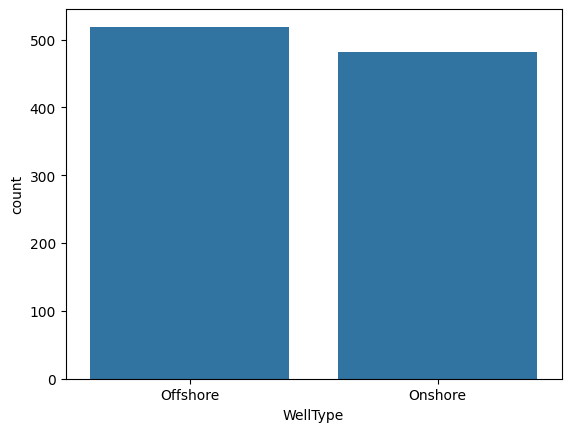

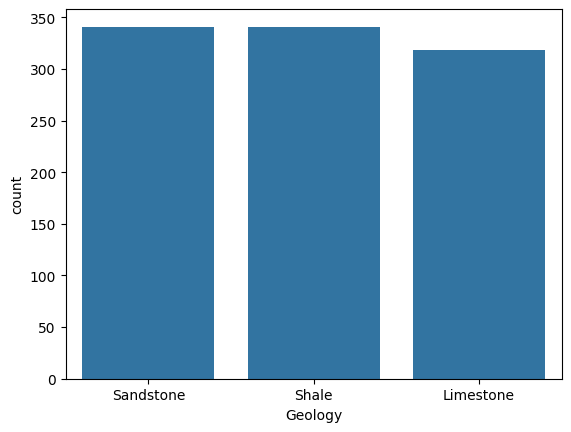

In [35]:
for col in cat_col:
  sns.countplot(data=data, x=col)
  plt.show()

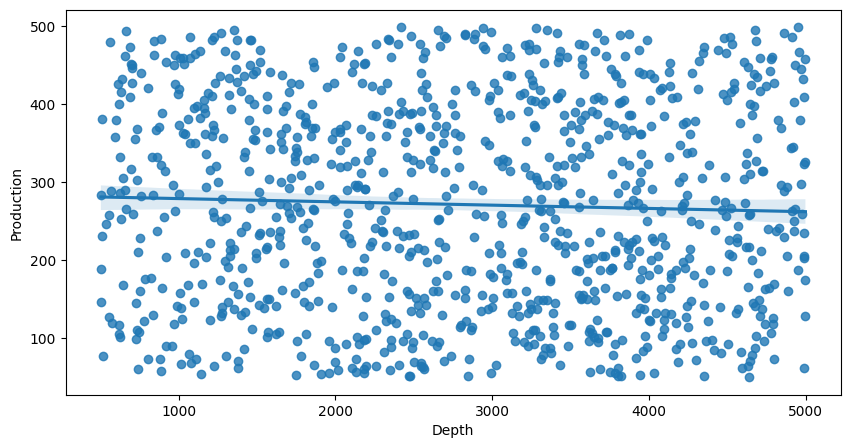

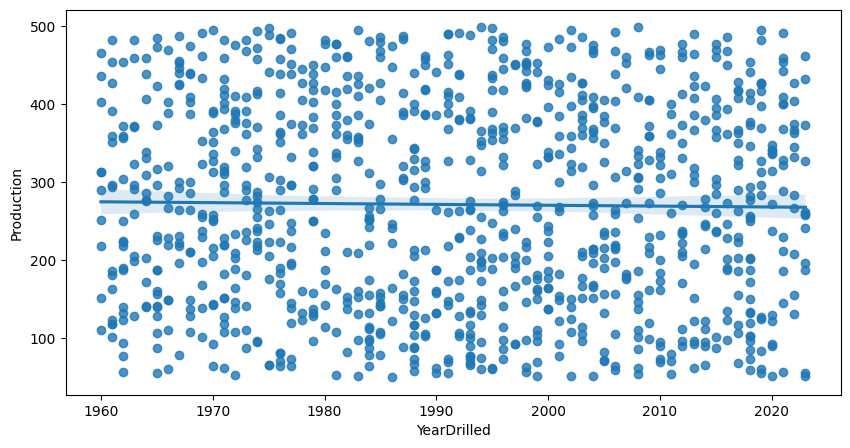

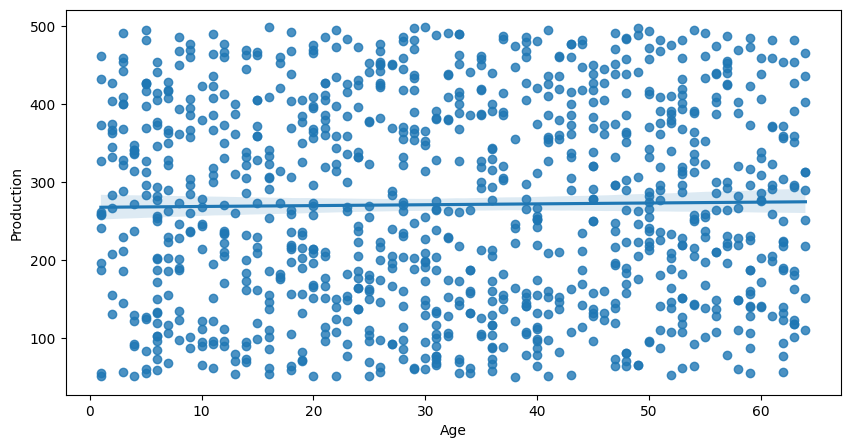

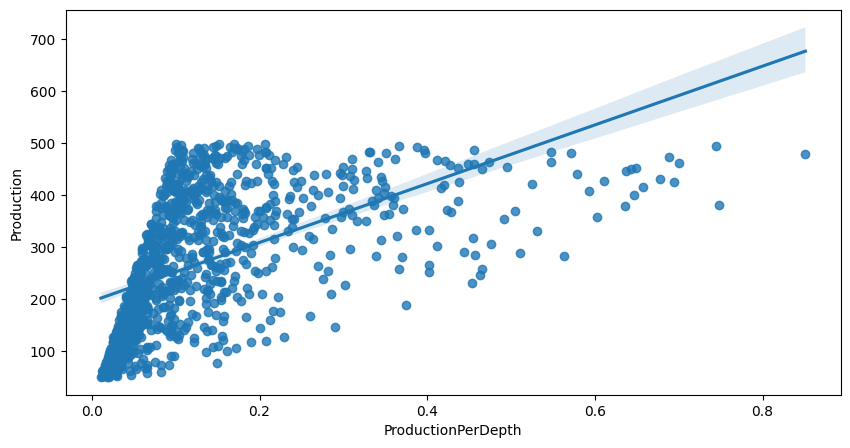

In [36]:
for col in num_col:
  if col not in ['WellID', 'Production']:
    plt.figure(figsize=(10,5))
    sns.regplot(x=col, y='Production', data=data)
    plt.show()

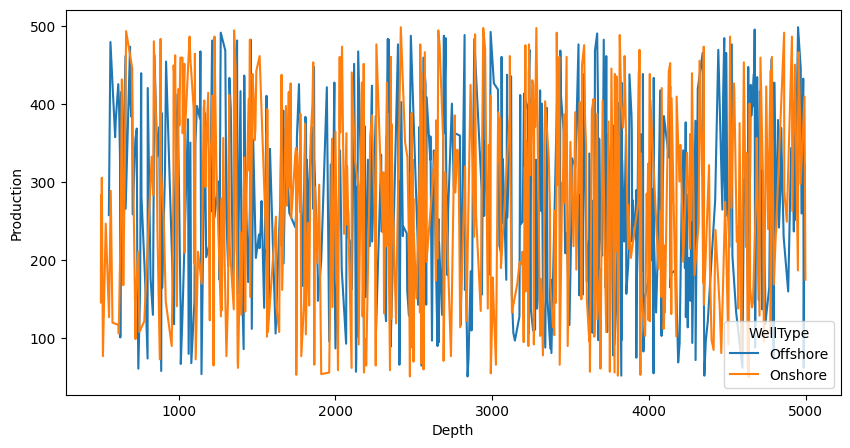

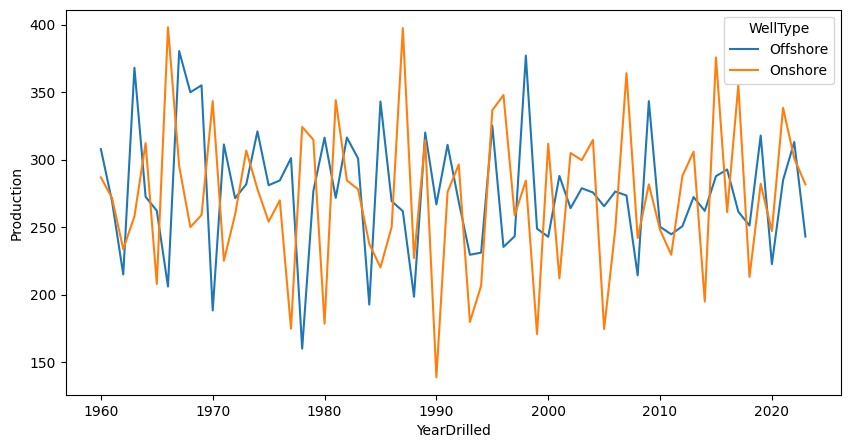

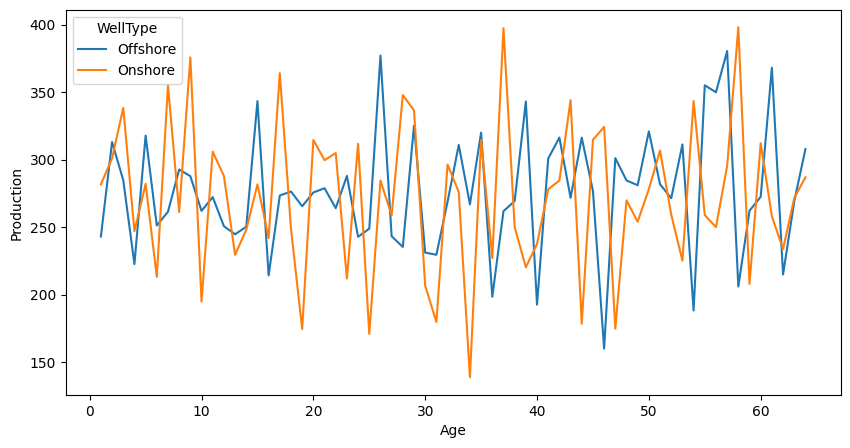

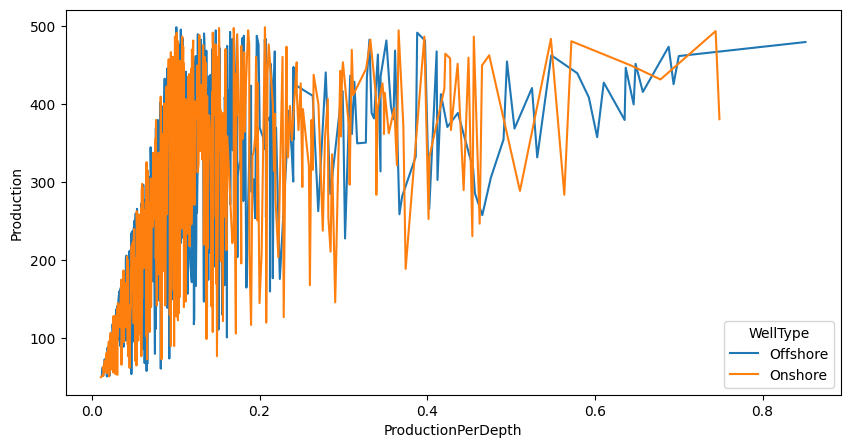

In [37]:
for col in num_col:
  if col not in ['WellID', 'Production']:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=col, y='Production', data=data, hue='WellType',errorbar=None)
    plt.show()

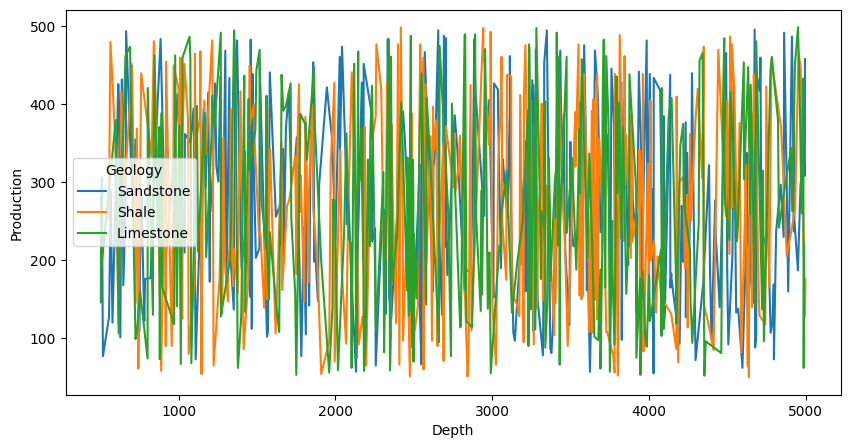

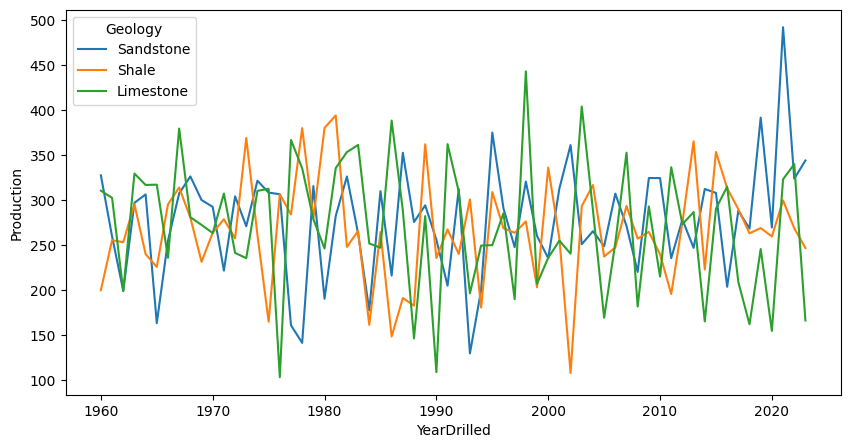

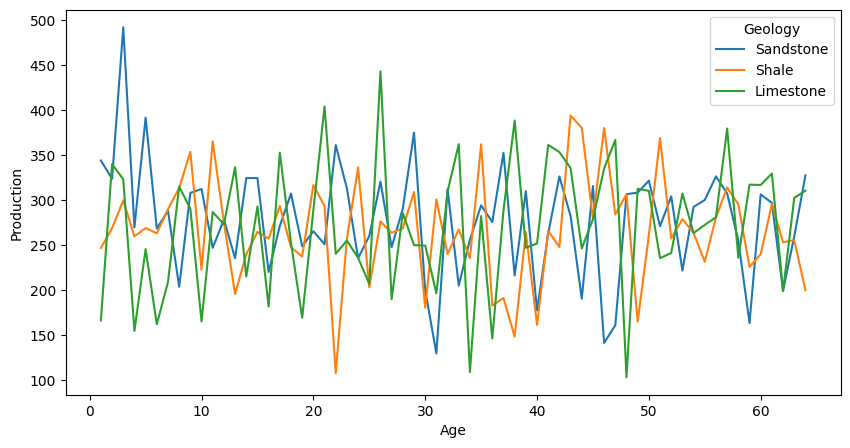

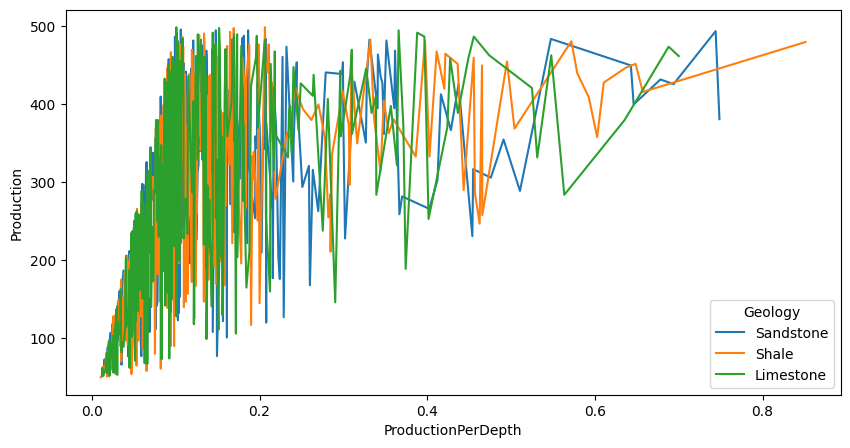

In [38]:
for col in num_col:
  if col not in ['WellID', 'Production']:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=col, y='Production', data=data, hue='Geology', errorbar=None)
    plt.show()

In [55]:
imp_num_col=[]
for col in num_col:
  if col not in ['WellID', 'Production','YearDrilled']:
    imp_num_col.append(col)
imp_num_col

['Depth', 'Age', 'ProductionPerDepth']

In [39]:
data.describe()

,WellID,Depth,YearDrilled,Production,Age,ProductionPerDepth
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2815.422000,1991.804000,271.519000,32.196000,0.133407
std,288.819436,1255.514921,18.185772,130.117386,18.185772,0.124346
min,1.000000,503.000000,1960.000000,50.000000,1.000000,0.010781
25%,250.750000,1749.500000,1976.000000,155.750000,16.750000,0.053152
50%,500.500000,2862.500000,1992.000000,266.000000,32.000000,0.096448
75%,750.250000,3849.500000,2007.250000,387.000000,48.000000,0.158240
max,1000.000000,4999.000000,2023.000000,499.000000,64.000000,0.851064


In [40]:
data.describe(include='O')

,WellType,Geology
count,1000,1000
unique,2,3
top,Offshore,Sandstone
freq,519,341


In [70]:
x = data.drop('Production', axis=1)
y = data['Production']
x.head()

,WellID,Depth,YearDrilled,WellType,Geology,Age,ProductionPerDepth
0,1,1360,2009,Offshore,Sandstone,15,0.341176
1,2,4272,2010,Offshore,Sandstone,14,0.079354
2,3,3592,1976,Onshore,Shale,48,0.107739
3,4,966,1973,Onshore,Shale,51,0.307453
4,5,4926,1968,Offshore,Sandstone,56,0.081811


In [71]:
x=x[imp_num_col+cat_col]
x.head()

,Depth,Age,ProductionPerDepth,WellType,Geology
0,1360,15,0.341176,Offshore,Sandstone
1,4272,14,0.079354,Offshore,Sandstone
2,3592,48,0.107739,Onshore,Shale
3,966,51,0.307453,Onshore,Shale
4,4926,56,0.081811,Offshore,Sandstone


In [158]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler, RobustScaler , MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [135]:
knn_imputer = KNNImputer(n_neighbors=5)
mean_imputer= SimpleImputer(strategy='mean')
mode_imputer= SimpleImputer(strategy='most_frequent')

In [136]:
one_hot_encoder = OneHotEncoder(drop='first')
label_encoder = LabelEncoder()

In [137]:
catpipe_mode_impute_onehot=Pipeline([('imputer', mode_imputer),
                              ('encoder', one_hot_encoder)])
catpipe_mode_impute_onehot

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))])

In [138]:
numpipe_mean_impute_robust=Pipeline([('imputer', mean_imputer),
                              ('scaler', RobustScaler())])
numpipe_mean_impute_robust

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', RobustScaler())])

In [139]:
preprocessor_pipeline=ColumnTransformer([('catpipe_mode_impute_onehot,', catpipe_mode_impute_onehot, cat_col),
                                         ('numpipe_mean_impute_robust', numpipe_mean_impute_robust, imp_num_col)], remainder='passthrough')
preprocessor_pipeline


ColumnTransformer(remainder='passthrough',
                  transformers=[('catpipe_mode_impute_onehot,',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['WellType', 'Geology']),
                                ('numpipe_mean_impute_robust',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'Age', 'ProductionPerDepth'])])

In [140]:
preprocessor_pipeline.fit_transform(x)

array([[ 0.        ,  1.        ,  0.        , -0.71547619, -0.544     ,
         2.32880434],
       [ 0.        ,  1.        ,  0.        ,  0.67119048, -0.576     ,
        -0.16266218],
       [ 1.        ,  0.        ,  1.        ,  0.34738095,  0.512     ,
         0.10745014],
       ...,
       [ 0.        ,  0.        ,  1.        , -0.12214286, -0.288     ,
         0.39311241],
       [ 0.        ,  0.        ,  0.        ,  0.88595238,  0.416     ,
        -0.64175666],
       [ 1.        ,  0.        ,  1.        ,  0.19309524, -0.64      ,
         0.16832943]])

In [141]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [142]:
lr=LinearRegression()
ridge=Ridge(alpha=1)
lasso=Lasso(alpha=1)
elastic=ElasticNet(alpha=1,l1_ratio=0.5)
knn=KNeighborsRegressor(n_neighbors=5, weights='uniform',
                        algorithm='auto', leaf_size=30, p=2,
                        metric='minkowski')
dt=DecisionTreeRegressor(criterion='squared_error', splitter='best')
rf=RandomForestRegressor(n_estimators=100, criterion='squared_error')
gb=GradientBoostingRegressor(loss='squared_error', learning_rate=0.1,
                             n_estimators=100, subsample=1.0,
                             criterion='friedman_mse', min_samples_split=2)

In [143]:
for model in [lr, ridge, lasso, elastic, knn, dt, rf, gb]:
  model_pipeline= Pipeline([("preprocessor",preprocessor_pipeline),("model",model)])
  model_pipeline.fit(x_train,y_train)
  train_score=model_pipeline.score(x_train,y_train)
  test_score=model_pipeline.score(x_test,y_test)
  print(f"Model_Name: {model},Train_score: {train_score}, Test_Score: {test_score}")

Model_Name: LinearRegression(),Train_score: 0.48392700054466076, Test_Score: 0.43504000066770276
Model_Name: Ridge(),Train_score: 0.48391436950942324, Test_Score: 0.4353563720410428
Model_Name: Lasso(),Train_score: 0.483049768727287, Test_Score: 0.4392219915624991
Model_Name: ElasticNet(),Train_score: 0.3326207079637453, Test_Score: 0.30804249296351327
Model_Name: KNeighborsRegressor(),Train_score: 0.8856057524904353, Test_Score: 0.8228556015114287
Model_Name: DecisionTreeRegressor(),Train_score: 1.0, Test_Score: 0.9617704908268395
Model_Name: RandomForestRegressor(),Train_score: 0.9985161857982202, Test_Score: 0.9902066002834141
Model_Name: GradientBoostingRegressor(),Train_score: 0.994151468280578, Test_Score: 0.9851121205605651


In [178]:
import statsmodels.api as sm

In [179]:
x_ols=sm.add_constant(x)
y_ols=y

In [180]:
from sklearn.model_selection import train_test_split
x_train_ols, x_test_ols, y_train_ols, y_test_ols = train_test_split(x_ols,y_ols, test_size=0.2, random_state=42)

In [181]:
x_train_preprocess_ols=preprocessor_pipeline.fit_transform(x_train_ols)
x_test_preprocess_ols=preprocessor_pipeline.transform(x_test_ols)

In [182]:
ols=sm.OLS(y_train_ols,x_train_preprocess_ols)
ols_model=ols.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Production   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     123.9
Date:                Sat, 15 Feb 2025   Prob (F-statistic):          2.29e-110
Time:                        07:47:00   Log-Likelihood:                -4779.6
No. Observations:                 800   AIC:                             9573.
Df Residuals:                     793   BIC:                             9606.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.9175      6.768      0.431      0.667     -10.368      16.203
x2            -2.2453      8.337     -0.269      0.788     -18.611      14.121
x3            -2.4845      8.352     -0.297      0.766     -18.879      13.910
x4           127.9771      7.633     16.765      0.000     112.993     142.961
x5            -2.7837      6.028     -0.462      0.644     -14.616       9.049
x6           104.7447      3.851     27.200      0.000      97.186     112.304
const        238.8689      6.979     34.227      0.000     225.169     252.568
==============================================================================
Omnibus:                       14.133   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.333
Skew:                          -0.309   Prob(JB):                     0.000772
Kurtosis:                       2.779   Cond. No.                         4.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
from sklearn.metrics import r2_score, mean_squared_error

In [184]:
ols_score_train=r2_score(y_train_ols,ols_model.predict(x_train_preprocess_ols))
ols_score_test=r2_score(y_test_ols,ols_model.predict(x_test_preprocess_ols))
print(f"Model_OLS,Train_score: {ols_score_train}, Test_Score: {ols_score_test}")

Model_OLS,Train_score: 0.48392700054466076, Test_Score: 0.43504000066770254


In [162]:
rf=RandomForestRegressor(random_state=100,bootstrap=True, oob_score=True)
rf_param={'n_estimators':np.arange(25,201,25),"criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"]}

In [163]:
random_cv=RandomizedSearchCV(estimator=rf, param_distributions=rf_param, cv=5, n_jobs=-1, verbose=2)

In [164]:
model_pipeline_random= Pipeline([("preprocessor",preprocessor_pipeline),("model",random_cv)])
model_pipeline_random

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('catpipe_mode_impute_onehot,',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['WellType', 'Geology']),
                                                 ('numpipe_mean_impute_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'Age',
                                                   'ProductionPerDepth'])])),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=RandomForestRegressor(oob_score=True,
                                                                    random_state=100),
                                    n_jobs=-1,
                                    param_distributions={'criterion': ['squared_error',
                                                                       'absolute_error',
                                                                       'friedman_mse',
                                                                       'poisson'],
                                                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200])},
                                    verbose=2))])

In [165]:
model_pipeline_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('catpipe_mode_impute_onehot,',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['WellType', 'Geology']),
                                                 ('numpipe_mean_impute_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'Age',
                                                   'ProductionPerDepth'])])),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=RandomForestRegressor(oob_score=True,
                                                                    random_state=100),
                                    n_jobs=-1,
                                    param_distributions={'criterion': ['squared_error',
                                                                       'absolute_error',
                                                                       'friedman_mse',
                                                                       'poisson'],
                                                         'n_estimators': array([ 25,  50,  75, 100, 125, 150, 175, 200])},
                                    verbose=2))])

In [166]:
randomcv_score_train=r2_score(y_train,model_pipeline_random.predict(x_train))
randomcv_score_test=r2_score(y_test,model_pipeline_random.predict(x_test))
print(f"Model_random_cv,Train_score: {randomcv_score_train}, Test_Score: {randomcv_score_test}")

Model_random_cv,Train_score: 0.9983440147460833, Test_Score: 0.9885454168929619


In [171]:
bestrf_param= random_cv.best_params_
bestrf_param

{'n_estimators': 150, 'criterion': 'friedman_mse'}

In [172]:
final_rf_model=RandomForestRegressor(random_state=100, bootstrap=True, oob_score=True, **bestrf_param)

In [175]:
model_pipeline_final_rf= Pipeline([("preprocessor",preprocessor_pipeline),("model",final_rf_model)])
model_pipeline_final_rf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('catpipe_mode_impute_onehot,',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['WellType', 'Geology']),
                                                 ('numpipe_mean_impute_robust',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Depth', 'Age',
                                                   'ProductionPerDepth'])])),
                ('model',
                 RandomForestRegressor(criterion='friedman_mse',
                                       n_estimators=150, oob_score=True,
                                       random_state=100))])

In [177]:
final_rf_score_train=r2_score(y_train,model_pipeline_final_rf.predict(x_train))
final_rf_score_test=r2_score(y_test,model_pipeline_final_rf.predict(x_test))
print(f"Model_Final_RF,Train_score: {final_rf_score_train}, Test_Score: {final_rf_score_test}")

Model_Final_RF,Train_score: 0.9983440147460833, Test_Score: 0.9885454168929619


In [203]:
preprocessor_pipeline_vif=ColumnTransformer([('numpipe_mean_impute_robust', numpipe_mean_impute_robust, imp_num_col)], remainder='drop')
preprocessor_pipeline_vif

ColumnTransformer(transformers=[('numpipe_mean_impute_robust',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Depth', 'Age', 'ProductionPerDepth'])])

In [205]:
x_train_preprocessed_vif = preprocessor_pipeline_vif.fit_transform(x_train)
x_train_preprocessed_vif [0]

array([-0.39180871, -0.0625    ,  0.80199988])

In [ ]:
# X-CAT  Y-CAT    chi2,
# X-CON  Y-CAT    f_classif  (ANOVA)
# X-CON/X-CAT     Y-CAT     mutual_info_classif
# X-CAT  Y-CON     f_regression (ANOVA)

from sklearn.feature_selection import SelectKBest,chi2, mutual_info_classif,f_classif,f_regression

# X-CAT  Y-CON    f_oneway   (Another approach)
from scipy.stats import f_oneway

# X-CON  Y-CON    corelation,variance_inflation_factor,pca
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
pd.Dataframe().corr()

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # check multi co-linearity
variable = x_train_preprocessed_vif
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['features'] = imp_num_col
vif

,variance_inflation_factor,features
0,1.713309,Depth
1,1.003251,Age
2,1.717450,ProductionPerDepth


In [232]:
corr_df=data[imp_num_col].corr()
corr_df

,Depth,Age,ProductionPerDepth
Depth,1.000000,-0.011237,-0.667336
Age,-0.011237,1.000000,0.014059
ProductionPerDepth,-0.667336,0.014059,1.000000


In [235]:
corr_triu_df=pd.DataFrame(data=np.triu(corr_df,k=1), index=imp_num_col, columns=imp_num_col)
corr_triu_df

,Depth,Age,ProductionPerDepth
Depth,0.0,-0.011237,-0.667336
Age,0.0,0.000000,0.014059
ProductionPerDepth,0.0,0.000000,0.000000


In [238]:
corr_triu_df["Depth"].min()

0.0

In [240]:
corr_col=[]
for col in imp_num_col:
  if corr_triu_df[col].max()>0.9 or corr_triu_df[col].min()<-0.9:
    corr_col.append(col)
corr_col

[]

In [247]:
from sklearn.feature_selection import SelectKBest,chi2, mutual_info_classif,f_classif,f_regression

In [248]:
preprocessor_pipeline_f_reg=ColumnTransformer([('catpipe_mode_impute_onehot,', catpipe_mode_impute_onehot, cat_col)], remainder='drop')
preprocessor_pipeline_f_reg


ColumnTransformer(transformers=[('catpipe_mode_impute_onehot,',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 ['WellType', 'Geology'])])

In [249]:
x_train_preprocessed_f_reg = preprocessor_pipeline_f_reg.fit_transform(x_train)
x_train_preprocessed_f_reg[0]

array([1., 1., 0.])

In [250]:
preprocessor_pipeline_f_reg.get_feature_names_out()

array(['catpipe_mode_impute_onehot,__WellType_Onshore',
       'catpipe_mode_impute_onehot,__Geology_Sandstone',
       'catpipe_mode_impute_onehot,__Geology_Shale'], dtype=object)

In [263]:
best_features = SelectKBest(score_func = f_regression, k='all')
fit = best_features.fit(x_train_preprocessed_f_reg, y_train)
feature_scores = pd.DataFrame({
    "Feature": preprocessor_pipeline_f_reg.get_feature_names_out(),
    "F-statistic": fit.scores_,
    "p-value": fit.pvalues_})
print(feature_scores)
best_features.get_support()

                                          Feature  F-statistic   p-value
0   catpipe_mode_impute_onehot,__WellType_Onshore     0.005514  0.940825
1  catpipe_mode_impute_onehot,__Geology_Sandstone     0.071025  0.789918
2      catpipe_mode_impute_onehot,__Geology_Shale     0.196764  0.657466


array([ True,  True,  True])

In [262]:
f_values, p_values = f_regression(x_train_preprocessed_f_reg, y_train)
feature_scores = pd.DataFrame({
    "Feature": preprocessor_pipeline_f_reg.get_feature_names_out(),
    "F-statistic": f_values,
    "p-value": p_values
})
feature_scores


,Feature,F-statistic,p-value
0,"catpipe_mode_impute_onehot,__WellType_Onshore",0.005514,0.940825
1,"catpipe_mode_impute_onehot,__Geology_Sandstone",0.071025,0.789918
2,"catpipe_mode_impute_onehot,__Geology_Shale",0.196764,0.657466
